In [16]:
import pandas as pd

In [17]:
data=pd.read_csv("NewspaperData.csv")

In [18]:
data.shape

(34, 3)

In [19]:
data.isnull().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


In [21]:
data.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


In [22]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Sunday Sales')

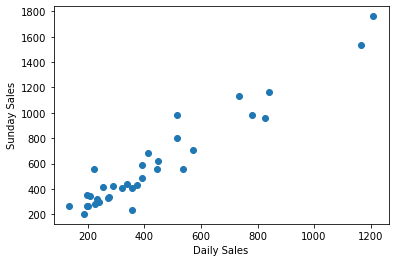

In [23]:
plt.scatter(data['daily'], data['sunday'])
plt.xlabel('Daily Sales')
plt.ylabel('Sunday Sales')

In [24]:
import statsmodels.formula.api as smf

In [25]:
model = smf.ols("sunday~daily", data=data).fit() #Ordinany least squares Used for regression(target~input)

In [26]:
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [27]:
model.rsquared #range 0-1, 1 is best

0.9180596895873294

In [28]:
import seaborn as sns

<AxesSubplot:xlabel='daily', ylabel='sunday'>

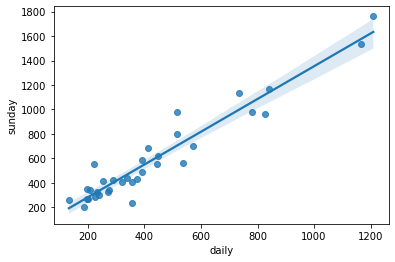

In [29]:
sns.regplot(x='daily',y='sunday', data=data)

In [30]:
#predict for data point

In [31]:
newdata=pd.Series([200,300])

In [32]:
newdata

0    200
1    300
dtype: int64

In [33]:
#Now convert series to data frame

In [35]:
data_pred=pd.DataFrame(newdata,columns=['daily'])

In [36]:
data_pred

,daily
0,200
1,300


In [37]:
model.predict(data_pred)

0    281.778581
1    415.750057
dtype: float64

In [38]:
#dataset2

In [40]:
cars = pd.read_csv("Cars.csv")

In [41]:
cars.head(10)

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
5,70,45.696322,89,113.185353,29.591768
6,55,50.013401,92,105.461264,30.308480
7,62,46.716554,50,102.598513,15.847758
8,62,46.716554,50,102.598513,16.359484
9,80,42.299078,94,115.645204,30.920154


In [42]:
cars.isnull().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [43]:
cars.info

<bound method DataFrame.info of      HP        MPG  VOL          SP         WT
0    49  53.700681   89  104.185353  28.762059
1    55  50.013401   92  105.461264  30.466833
2    55  50.013401   92  105.461264  30.193597
3    70  45.696322   92  113.461264  30.632114
4    53  50.504232   92  104.461264  29.889149
..  ...        ...  ...         ...        ...
76  322  36.900000   50  169.598513  16.132947
77  238  19.197888  115  150.576579  37.923113
78  263  34.000000   50  151.598513  15.769625
79  295  19.833733  119  167.944460  39.423099
80  236  12.101263  107  139.840817  34.948615

[81 rows x 5 columns]>

In [44]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [45]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


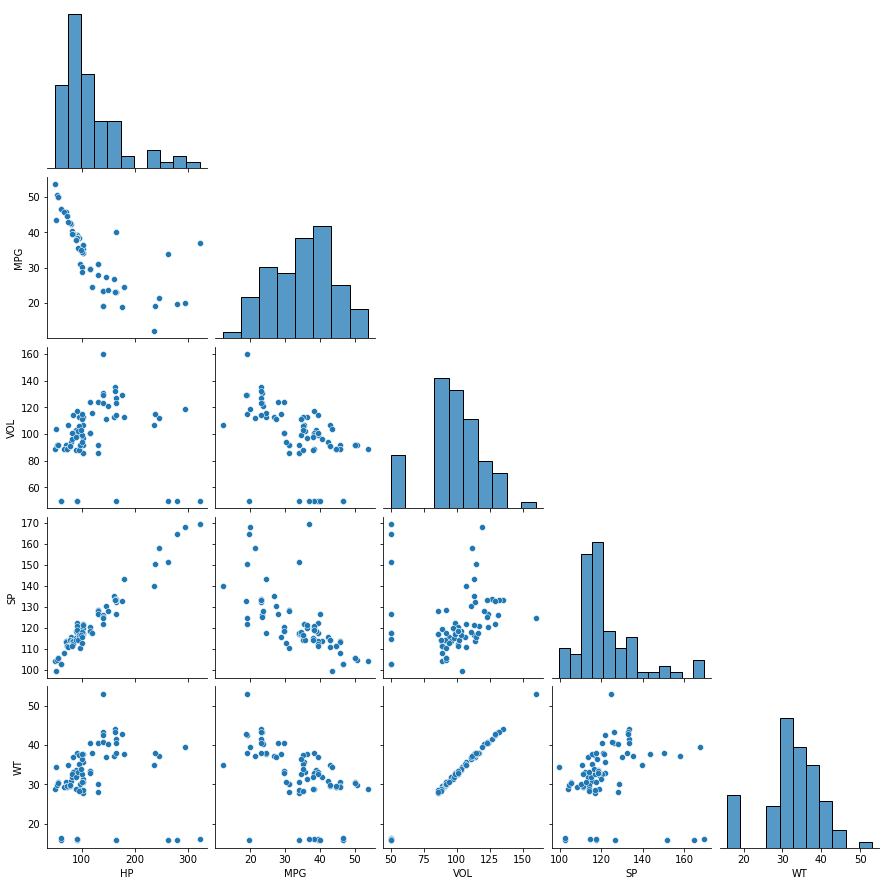

In [46]:
sns.pairplot(cars, corner=True)

In [47]:
model_car = smf.ols('MPG~WT+VOL+SP+HP', data=cars).fit()

In [48]:
model_car.params

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [49]:
model_car.rsquared

0.7705372737359842

In [51]:
print(model_car.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Fri, 27 May 2022   Prob (F-statistic):           1.54e-23
Time:                        23:04:53   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.0